In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import os
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")



In [21]:
data=pd.read_csv("googleplaystore_user_reviews.csv",encoding="latin1")

In [22]:
data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [23]:
#selecting reviews and type of reviews
df=pd.concat([data.Translated_Review,data.Sentiment],axis=1)
df.dropna(axis=0,inplace=True)
df.head(10)

,Translated_Review,Sentiment
0,I like eat delicious food. That's I'm cooking ...,Positive
1,This help eating healthy exercise regular basis,Positive
3,Works great especially going grocery store,Positive
4,Best idea us,Positive
5,Best way,Positive
6,Amazing,Positive
8,"Looking forward app,",Neutral
9,It helpful site ! It help foods get !,Neutral
10,good you.,Positive
11,Useful information The amount spelling errors ...,Positive


In [24]:
df.Sentiment.value_counts()

Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64


Converting review types to int form in order to use classification methods.
0= Positive, 1=Negative, 2= Neutral

In [25]:
df.Sentiment=[0 if i=="Positive" else 1 if i== "Negative" else 2 for i in df.Sentiment]
df.head(10)

,Translated_Review,Sentiment
0,I like eat delicious food. That's I'm cooking ...,0
1,This help eating healthy exercise regular basis,0
3,Works great especially going grocery store,0
4,Best idea us,0
5,Best way,0
6,Amazing,0
8,"Looking forward app,",2
9,It helpful site ! It help foods get !,2
10,good you.,0
11,Useful information The amount spelling errors ...,0


now we remove characters which are not letters eg: :)$@#...

In [26]:
#Data cleaning
import re   #regular expression
first_text=df.Translated_Review[0]
text=re.sub("[^a-zA-Z]"," ",first_text) #changing characters with space
text=text.lower()

In [27]:
print(df.Translated_Review[0]) #lets review of changings
print(text)

I like eat delicious food. That's I'm cooking food myself, case "10 Best Foods" helps lot, also "Best Before (Shelf Life)"
i like eat delicious food  that s i m cooking food myself  case     best foods  helps lot  also  best before  shelf life  


In [28]:
#stopwords (irrelavent words)
import nltk
nltk.download("stopwords")
nltk.download("punkt")
from nltk.corpus import stopwords
text=nltk.word_tokenize(text) #separate all words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [29]:
text

['i',
 'like',
 'eat',
 'delicious',
 'food',
 'that',
 's',
 'i',
 'm',
 'cooking',
 'food',
 'myself',
 'case',
 'best',
 'foods',
 'helps',
 'lot',
 'also',
 'best',
 'before',
 'shelf',
 'life']

With lemmatization we can convert words to their root format.
For instance books--->book

In [30]:
import nltk as nlp
lemma=nlp.WordNetLemmatizer()
text=[lemma.lemmatize(i) for i in text]
text=" ".join(text)
text

'i like eat delicious food that s i m cooking food myself case best food help lot also best before shelf life'

In [31]:
#we apply it to all dataset
text_list=[]
for i in df.Translated_Review:
    text=re.sub("[^a-zA-Z]"," ",i)
    text=text.lower()
    text=nltk.word_tokenize(text)
    lemma=nlp.WordNetLemmatizer()
    text=[lemma.lemmatize(word) for word in text]
    text=" ".join(text)
    text_list.append(text)

In [32]:
text_list[:10]

['i like eat delicious food that s i m cooking food myself case best food help lot also best before shelf life',
 'this help eating healthy exercise regular basis',
 'work great especially going grocery store',
 'best idea u',
 'best way',
 'amazing',
 'looking forward app',
 'it helpful site it help food get',
 'good you',
 'useful information the amount spelling error question validity information shared once fixed star given']

In [14]:
#bag of words
from sklearn.feature_extraction.text import CountVectorizer
max_features=200000
cou_vec=CountVectorizer(max_features=max_features,stop_words="english")
sparce_matrix=cou_vec.fit_transform(text_list).toarray()
all_words=cou_vec.get_feature_names()
print("Most used words: ",all_words[50:100])

Most used words:  ['aborted', 'aborting', 'abortion', 'abou', 'abousolutely', 'abracadabra', 'abroad', 'abrupt', 'abruptly', 'absence', 'absent', 'absolute', 'absolutely', 'absolutly', 'absorbing', 'abstract', 'abstraction', 'absurd', 'abt', 'abu', 'abundance', 'abundant', 'abundantly', 'abuse', 'abused', 'abuser', 'abusing', 'abusive', 'abysmal', 'abyss', 'ac', 'aca', 'academia', 'acc', 'accasionly', 'accelent', 'accelerate', 'acceleration', 'accent', 'accentuates', 'accept', 'acceptable', 'acceptance', 'accepted', 'accepting', 'accepts', 'acces', 'accesable', 'access', 'accessabilty']


In [33]:
#classification
y=df.iloc[:,1].values
x=sparce_matrix
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [34]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, random_state=42)
rf.fit(x_train,y_train)
print("accuracy: ",rf.score(x_test,y_test))

accuracy:  0.877504675394069


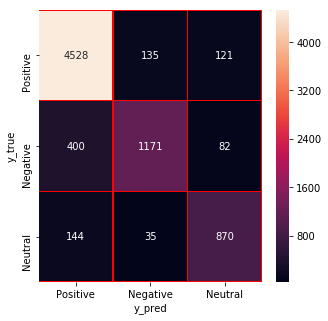

In [35]:
#confussion matrix
y_pred=rf.predict(x_test)
y_true=y_test
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
names=["Positive","Negative","Neutral"]
cm=confusion_matrix(y_true,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

We ended up getting a accuracy of 87% which is good

In [36]:
#we now try the logistic regression

#logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
print("lr accuracy: ",lr.score(x_test,y_test))

lr accuracy:  0.9084958589366818


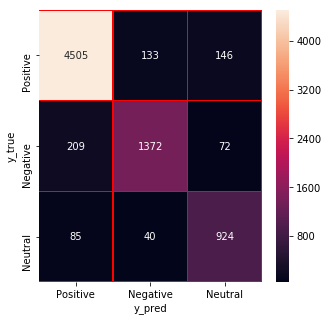

In [37]:
#confussion matrix
y_pred=lr.predict(x_test)
y_true=y_test

names=["Positive","Negative","Neutral"]
cm=confusion_matrix(y_true,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()